<a href="https://colab.research.google.com/github/bartoszgajda55/Tensorflow2DeepLearning/blob/master/TF2.0%20Autoregressive%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

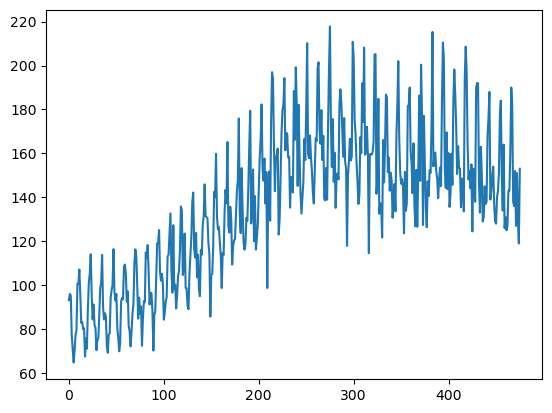

In [ ]:
# Make the original data
series = pd.read_csv('datasets_56102_107707_monthly-beer-production-in-austr.csv',index_col=0,parse_dates=True).values

plt.plot(series)
plt.show()

In [111]:
# Build the dataset
T = 12
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (464, 12) Y.shape (464, 1)


In [112]:
# Try autoregressive model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
)

# train 
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 232 samples, validate on 232 samples
Epoch 1/80
232/232 [==============================] - 0s 427us/sample - loss: 73798.6837 - val_loss: 102806.9741
Epoch 2/80
232/232 [==============================] - 0s 60us/sample - loss: 25236.6710 - val_loss: 12454.6439
Epoch 3/80
232/232 [==============================] - 0s 47us/sample - loss: 11649.1844 - val_loss: 2298.6450
Epoch 4/80
232/232 [==============================] - 0s 47us/sample - loss: 3168.5678 - val_loss: 8364.8831
Epoch 5/80
232/232 [==============================] - 0s 43us/sample - loss: 1787.8193 - val_loss: 3980.0479
Epoch 6/80
232/232 [==============================] - 0s 56us/sample - loss: 1577.9378 - val_loss: 2723.9669
Epoch 7/80
232/232 [==============================] - 0s 168us/sample - loss: 1234.7062 - val_loss: 1302.6375
Epoch 8/80
232/232 [==============================] - 0s 82us/sample - loss: 837.5263 - val_loss: 1211.5027
Epoch 9/80
232/232 [==============================] - 0s 60us/sample - loss

204.1852922110722

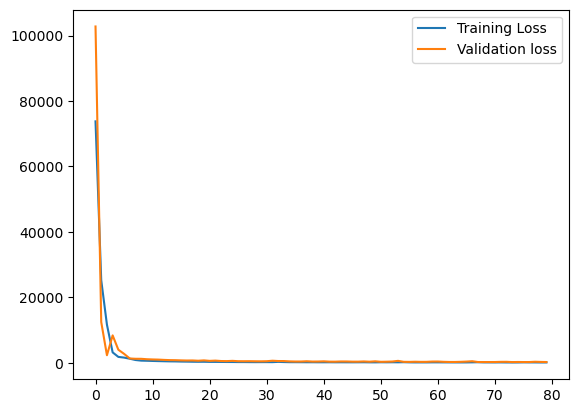

In [113]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="Training Loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.legend()

min(r.history['val_loss'])

In [ ]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2]

ii = N//2


while ii < N:
    X_ii = X[ii,:]
    validation_predictions.append(model.predict(X_ii.reshape(1,-1))[0,0])
    ii += 1


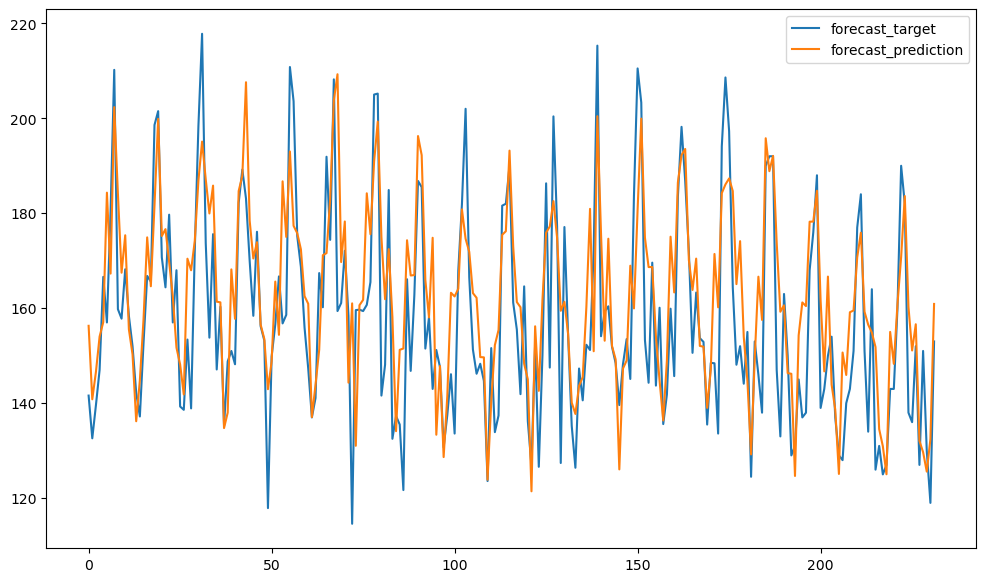

In [115]:
plt.figure(figsize=(12,7))
plt.plot(validation_target, label="forecast_target")
plt.plot(validation_predictions, label="forecast_prediction")
plt.legend()

In [116]:
# weights = np.flip(model.weights[0].numpy()[:,0])
# plt.bar(range(1,len(weights)+1),weights)
